In [2]:
import pandas as pd 

In [7]:
# Import needed data

software_technique_table = pd.read_excel("../Data/enterprise-attack-v9.0-software.xlsx", "techniques used")
software_technique_table.drop(columns=["source type", "mapping type", "mapping description", "target type"])

#Vektor an Techniques pro Software
#Tabelle mit Techniques und Software auf den Achsen und vielen Nullen und Einsen 
association = pd.read_excel("../Data/Data collection MITRE ATT&CK.xlsx", sheet_name = 'Association_compact')
matrix = pd.read_excel("../Data/Data collection MITRE ATT&CK.xlsx", sheet_name = 'Vektordarstellung')

technique_list = pd.read_excel("../Data/Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID', 'tactics'])


In [4]:
# want to plot
# - target ID (=technique ID) by appearance
# - Verteilung der Target IDs plotten
# - Anzahl Techniques pro Software plotten
# Anzahl verschiedener Techniques

# later
# Anzahl tactics pro Technique (Verteilung)
# Welche Tacics haben wieviele verschiedene Techniques
# Anzahl Software/ Techniques über die Jahre

<AxesSubplot:>

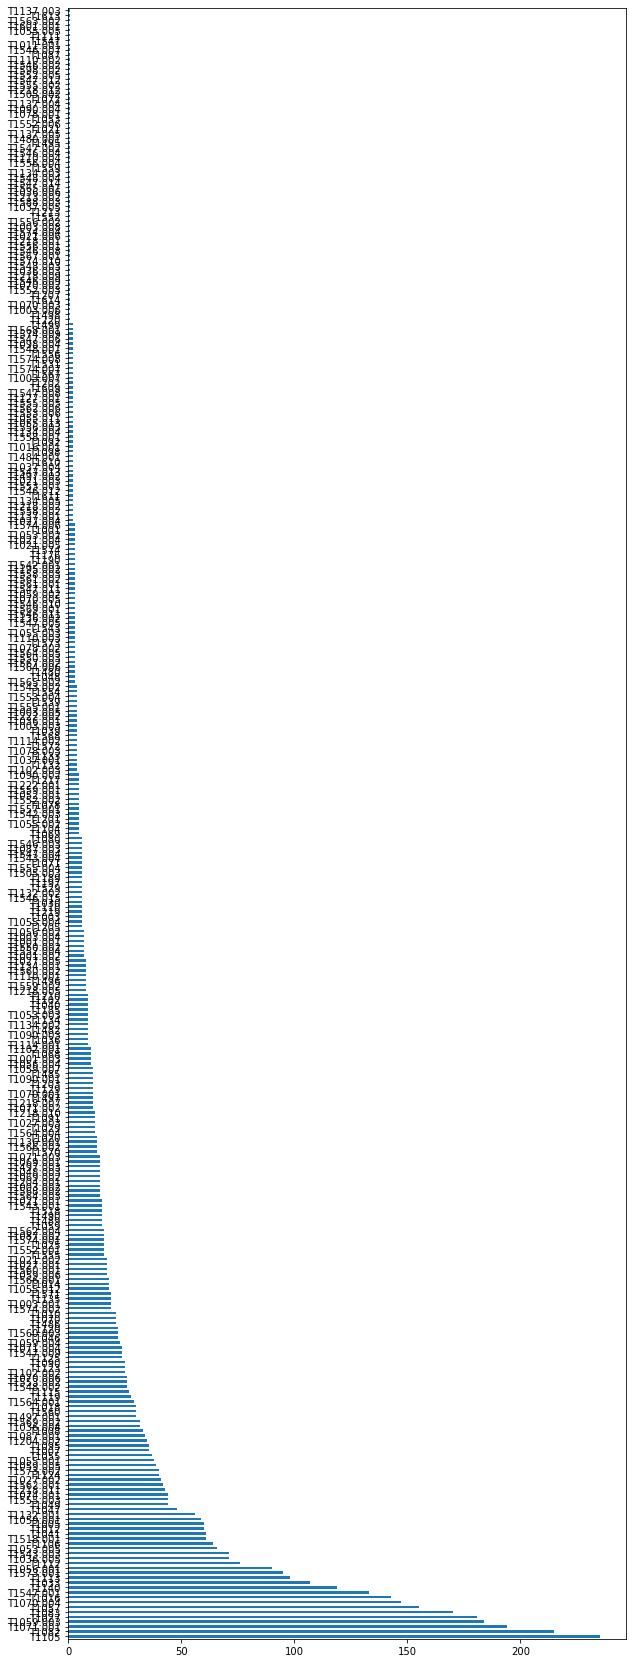

In [3]:
number_of_techniques = software_technique_table["target ID"].value_counts()
number_of_techniques.plot(kind = 'barh')
software_technique_table["target ID"].value_counts().plot(kind='barh', figsize=(10, 30))

In [4]:
number_of_techniques_per_software = software_technique_table["source ID"].value_counts()
number_of_techniques_per_software = pd.DataFrame(number_of_techniques_per_software)
pd.set_option('display.max_rows', 493)

In [12]:
dfmatrix = pd.DataFrame(matrix)
dfmatrix = dfmatrix.set_index('ID')

#initialisiere die Werte in der Tabelle mit 0
dfmatrix = dfmatrix.fillna(int(0))

dfmatrix

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,01 March 2021,...,04 June 2019,31 May 2017,31 May 2017,31 May 2017,31 May 2017,18 April 2018,18 April 2018,31 May 2017,17 October 2018,30 January 2019
T1548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#eigentliche Magie | Kombinationen werden markiert, die "genutzt werden"
software = association['source ID']
techniques = association['target ID']

print(techniques)

#Es werden Software-Technique-Tupel erstellt und in data gespeichert
data = []
for i in range (len(software)):
    tuple = [(software)[i], (techniques)[i]]
    data.append(tuple)

#Schleife durch die Tupel und dabei werden an der entschrechenden Matrix Einsen eingetragen
for i in data:
    dfmatrix[i[0]][i[1]] = int(1)  
dfmatrix


0           T1083
1       T1573.001
2       T1070.006
3       T1071.001
4           T1083
          ...    
5709        T1082
5710        T1016
5711        T1033
5712    T1059.003
5713    T1543.003
Name: target ID, Length: 5714, dtype: object


,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,01 March 2021,...,04 June 2019,31 May 2017,31 May 2017,31 May 2017,31 May 2017,18 April 2018,18 April 2018,31 May 2017,17 October 2018,30 January 2019
T1548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
T1548.004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1548.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Initialisiere und Fülle die Summen, um anschließend damit weiter zurechnen

# Leere die Spalten, damit sie anschließend komplett überschrieben werden können
dfmatrix['technique_sum'] = 0
dfmatrix.loc['software_sum'] = 0

technique_sum = dfmatrix.transpose().drop(['created'], axis = 1).sum(axis = 0)
software_sum = dfmatrix.transpose().drop(['created'], axis = 1).sum(axis = 1)

# Droppe Techniken die weniger als xxx Software benutzen
dfmatrix['technique_sum'] = technique_sum
dfmatrix.loc['software_sum'] = software_sum

dfmatrix.transpose().drop(dfmatrix.transpose()[dfmatrix.transpose()['software_sum'] < 1].index[:-1], inplace = True)
dfmatrix.drop(dfmatrix[dfmatrix['technique_sum'] < 4].index, inplace = True)
#dfmatrix = dfmatrix.transpose().drop(dfmatrix.transpose()[dfmatrix.transpose()['software_sum'] < 1].index, inplace = True)

                          
#Aktualisiere die Summen
dfmatrix['technique_sum'] = 0
dfmatrix.loc['software_sum'] = 0

technique_sum = dfmatrix.transpose().drop(['created'], axis = 1).sum(axis = 0)
software_sum = dfmatrix.transpose().drop(['created'], axis = 1).sum(axis = 1)
dfmatrix['technique_sum'] = technique_sum
dfmatrix.loc['software_sum'] = software_sum

dfmatrix

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350,technique_sum
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,01 March 2021,...,31 May 2017,31 May 2017,31 May 2017,31 May 2017,18 April 2018,18 April 2018,31 May 2017,17 October 2018,30 January 2019,NaN
T1548.002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,26
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
T1087.002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
T1087.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
T1087.001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,34
T1071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [16]:
#droppe hier noch die leeren Software
dfmatrix = dfmatrix.transpose().drop(dfmatrix.transpose()[dfmatrix.transpose()['software_sum'] < 1].index[:-1]).transpose()
dfmatrix

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0104,S0385,S0067,S0006,S0103,S0111,S0123,S0248,S0350,technique_sum
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,31 May 2017,10 June 2020,31 May 2017,31 May 2017,28 December 2020,29 January 2019,31 May 2017,10 September 2020,01 March 2021,...,31 May 2017,04 June 2019,31 May 2017,31 May 2017,31 May 2017,31 May 2017,31 May 2017,17 October 2018,30 January 2019,NaN
T1548.002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,26
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
T1087.002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
T1087.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
T1087.001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,34
T1071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [247]:
#Matrix in csv speichern 
dfmatrix.to_csv('matrix reduced < 4a.csv', sep = ";")

In [17]:
#Experimente mit Tactics und Techniques
technique_list = technique_list.set_index('ID')

df_list = pd.DataFrame(technique_list).sort_values('tactics')
unique_list = df_list.drop_duplicates(subset = "tactics", ignore_index = True)
split_list = df_list['tactics'].str.split(',', expand = True)
#split_list = split_list.fillna("")
unique_list.set_index('tactics')
len(split_list)

                                         tactics
ID                                              
T1548      Defense Evasion, Privilege Escalation
T1548.002  Defense Evasion, Privilege Escalation
T1548.004  Defense Evasion, Privilege Escalation
T1548.001  Defense Evasion, Privilege Escalation
T1548.003  Defense Evasion, Privilege Escalation
...                                          ...
T1102.002                    Command And Control
T1102.001                    Command And Control
T1102.003                    Command And Control
T1047                                  Execution
T1220                            Defense Evasion

[552 rows x 1 columns]


552

<AxesSubplot:ylabel='tactics'>

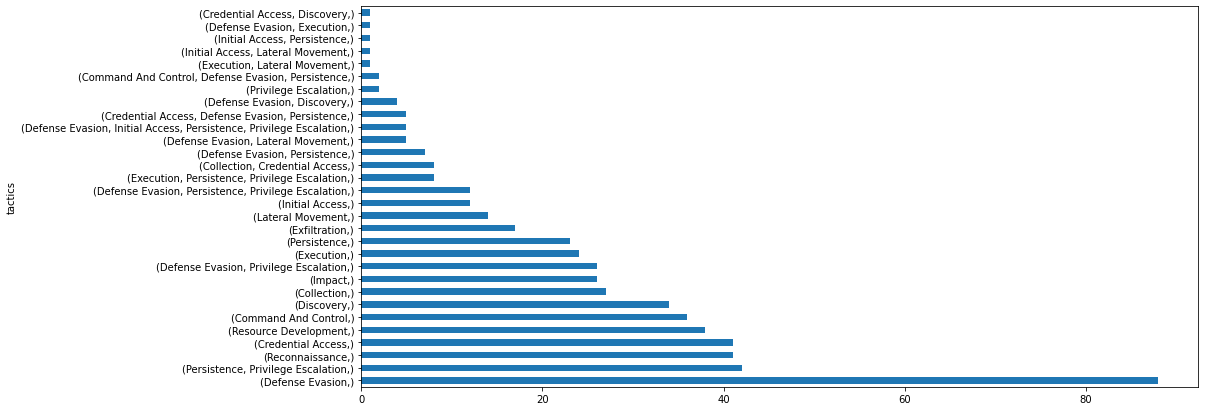

In [12]:
#wie oft kommt eine Kombination vor?
df_list.value_counts().plot(kind='barh', figsize=(15,7))


In [13]:
#wieviele Techniken können in unterschiedlichen Phasen vorkommen

split_list.to_csv('split_list.csv', sep = ";")
fourtimes = split_list[3].value_counts().sum() 
threetimes = split_list[2].value_counts().sum() - fourtimes 
twotimes = split_list[1].value_counts().sum() - threetimes - fourtimes
onetime = split_list[0].value_counts().sum() - twotimes - threetimes - fourtimes

onetime, twotimes, threetimes, fourtimes


(423, 97, 27, 5)